In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load & Merge Data

In [3]:
properties = pd.read_csv('Data/properties_2016.csv', header=0, encoding='utf-8')
train = pd.read_csv('Data/train_2016_v2.csv', parse_dates=["transactiondate"], header=0, encoding='utf-8')

merged_df = pd.merge(train,properties,on="parcelid",how="left")

print("Shape Of Dataset: ", merged_df.shape)

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape Of Dataset:  (90275, 60)


### Save Merged Data

In [4]:
merged_df.to_csv("Data/merged_2016.csv", index=False)

# Data Exploration

### Renaming the features

In [5]:
merged_df = pd.read_csv("Data/merged_2016.csv")

renamed_columns = {
    'parcelid': 'id_parcel',
    'yearbuilt': 'build_year',
    'basementsqft': 'area_basement',
    'yardbuildingsqft17': 'area_patio',
    'yardbuildingsqft26': 'area_storage_shed',
    'poolsizesum': 'area_pool',
    'lotsizesquarefeet': 'area_lot',
    'garagetotalsqft': 'area_garage',
    'finishedfloor1squarefeet': 'area_firstfloor_finished',
    'calculatedfinishedsquarefeet': 'area_total_calculated',
    'finishedsquarefeet6': 'area_finished_base',
    'finishedsquarefeet12': 'area_finished_living',
    'finishedsquarefeet13': 'area_perimeter_living',
    'finishedsquarefeet15': 'area_total',
    'finishedsquarefeet50': 'area_finished_first_floor',
    'unitcnt': 'num_unit',
    'numberofstories': 'num_story',
    'roomcnt': 'num_room',
    'bathroomcnt': 'num_bathroom',
    'bedroomcnt': 'num_bedroom',
    'calculatedbathnbr': 'num_bathroom_calculated',
    'fullbathcnt': 'num_bath',
    'threequarterbathnbr': 'num_quarter_bathroom',
    'fireplacecnt': 'num_fireplace',
    'poolcnt': 'num_pool',
    'garagecarcnt': 'num_garage',
    'regionidcounty': 'region_county',
    'regionidcity': 'region_city',
    'regionidzip': 'region_zip',
    'regionidneighborhood': 'region_neighborhood',
    'taxvaluedollarcnt': 'tax_dollar_value',
    'structuretaxvaluedollarcnt': 'tax_building',
    'landtaxvaluedollarcnt': 'tax_land',
    'taxamount': 'tax_amount',
    'assessmentyear': 'tax_assessment_year',
    'taxdelinquencyflag': 'tax_delinquency_flag',
    'taxdelinquencyyear': 'tax_delinquency_year',
    'propertyzoningdesc': 'zoning_desc',
    'propertylandusetypeid': 'zoning_landuse_type',
    'propertycountylandusecode': 'zoning_landuse_county',
    'fireplaceflag': 'flag_fireplace',
    'hashottuborspa': 'flag_tub',
    'buildingqualitytypeid': 'quality',
    'buildingclasstypeid': 'framing',
    'typeconstructiontypeid': 'material',
    'decktypeid': 'deck',
    'storytypeid': 'story',
    'heatingorsystemtypeid': 'heating',
    'airconditioningtypeid': 'aircon',
    'architecturalstyletypeid': 'architectural_style',
    'transactiondate': 'transaction_date',
    'rawcensustractandblock': 'census_tract_and_block_raw',
    'censustractandblock': 'census_tract_and_block'
}

merged_df.rename(columns=renamed_columns, inplace=True)

# convert data type of some features 
merged_df['tax_delinquency_flag'] = merged_df['tax_delinquency_flag'].apply(lambda x: 1 if x == "Y" else 0)
merged_df['flag_fireplace'] = merged_df['flag_fireplace'].apply(lambda x: 1 if x == "Y" else 0)
merged_df['flag_tub'] = merged_df['flag_tub'].apply(lambda x: 1 if x == "Y" else 0)

print(merged_df.describe())

          id_parcel      logerror        aircon  architectural_style  \
count  9.027500e+04  90275.000000  28781.000000           261.000000   
mean   1.298466e+07      0.011457      1.816372             7.229885   
std    2.504510e+06      0.161079      2.974168             2.716196   
min    1.071174e+07     -4.605000      1.000000             2.000000   
25%    1.155950e+07     -0.025300      1.000000             7.000000   
50%    1.254734e+07      0.006000      1.000000             7.000000   
75%    1.422755e+07      0.039200      1.000000             7.000000   
max    1.629608e+08      4.737000     13.000000            21.000000   

       area_basement  num_bathroom   num_bedroom  framing       quality  \
count      43.000000  90275.000000  90275.000000     16.0  57364.000000   
mean      713.581395      2.279474      3.031869      4.0      5.565407   
std       437.434198      1.004271      1.156436      0.0      1.900602   
min       100.000000      0.000000      0.000000   

### Show Frst Few Rows of Data

In [6]:
merged_df.head(3).transpose()

,0,1,2
id_parcel,11016594,14366692,12098116
logerror,0.0276,-0.1684,-0.004
transaction_date,2016-01-01,2016-01-01,2016-01-01
aircon,1,NaN,1
architectural_style,NaN,NaN,NaN
area_basement,NaN,NaN,NaN
num_bathroom,2,3.5,3
num_bedroom,3,4,2
framing,NaN,NaN,NaN
quality,4,NaN,4


### Plot the target class (shares)

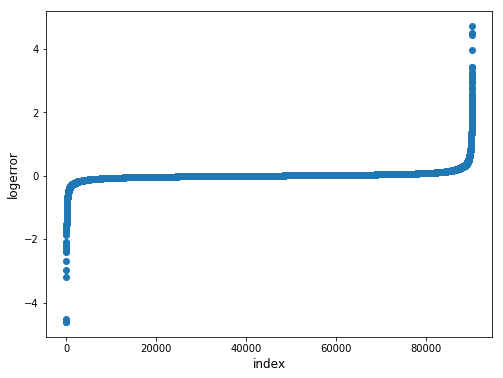

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df['logerror'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

This looks nice with some outliers at both the ends.!

Let us remove the outliers and then do a histogram plot on the same.

In [8]:
merged_df = merged_df[merged_df['logerror'] < merged_df['logerror'].quantile(.99)]
merged_df = merged_df[merged_df['logerror'] > merged_df['logerror'].quantile(.01)]

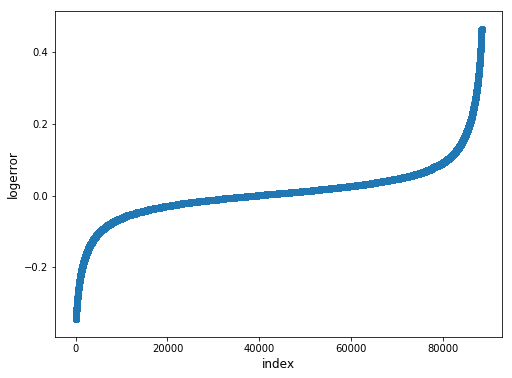

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df['logerror']))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

### Plot Histogram of Target Class (logerror)

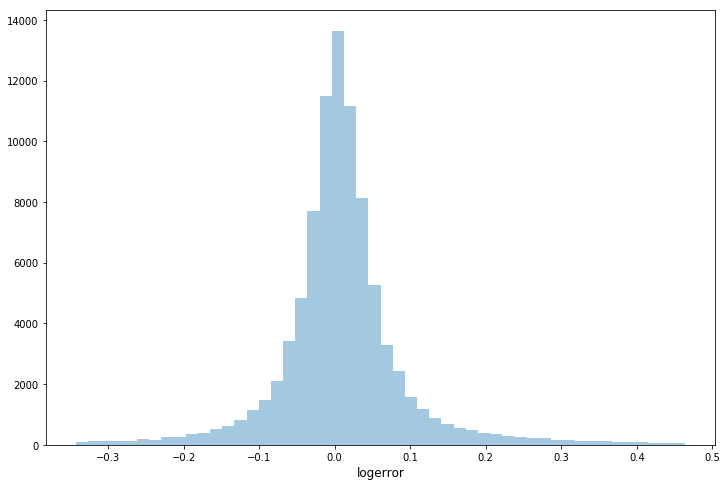

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(merged_df['logerror'], bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### More thoughts about the outcome
In fact there are two outcomes you can look at:

* logerror: log(Zestimate) - log(Saleprice). So a positive logerror means Zestimate is overestimating the Saleprice, a negative logerror means that Zestimate is underestimating Saleprice.
* absolute logerror: a small value means that log(Zestimate) is close to log(Saleprice). So, Zestimate predictions are close to Saleprice.

Any association with logerror would indicate that a feature would be associated with over- or understimating the sale price. Any association of a feature with absolute logerror would indicate that the feature is associated with a better or worse Zestimate.

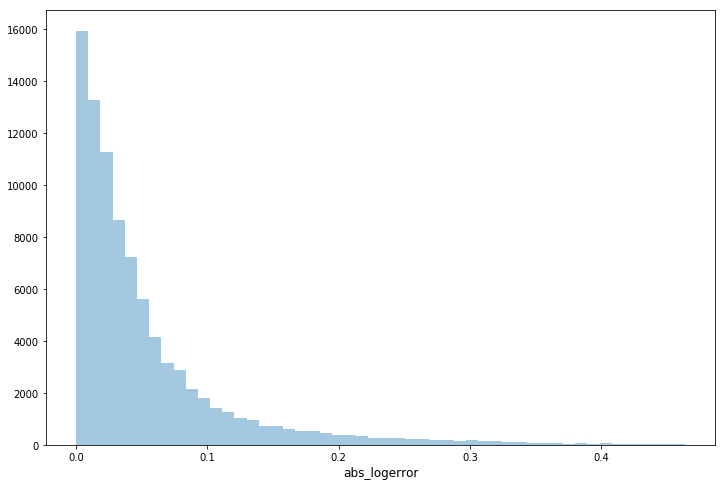

In [11]:
merged_df['abs_logerror'] = merged_df['logerror'].abs()

plt.figure(figsize=(12,8))
sns.distplot(merged_df['abs_logerror'], bins=50, kde=False)
plt.xlabel('abs_logerror', fontsize=12)
plt.show()

### Missing values

We have seen many missing values in the data peeking. How many missing values are there for each feature? In fact, some features are missing nearly completely. So, we probably have to work more with the others.

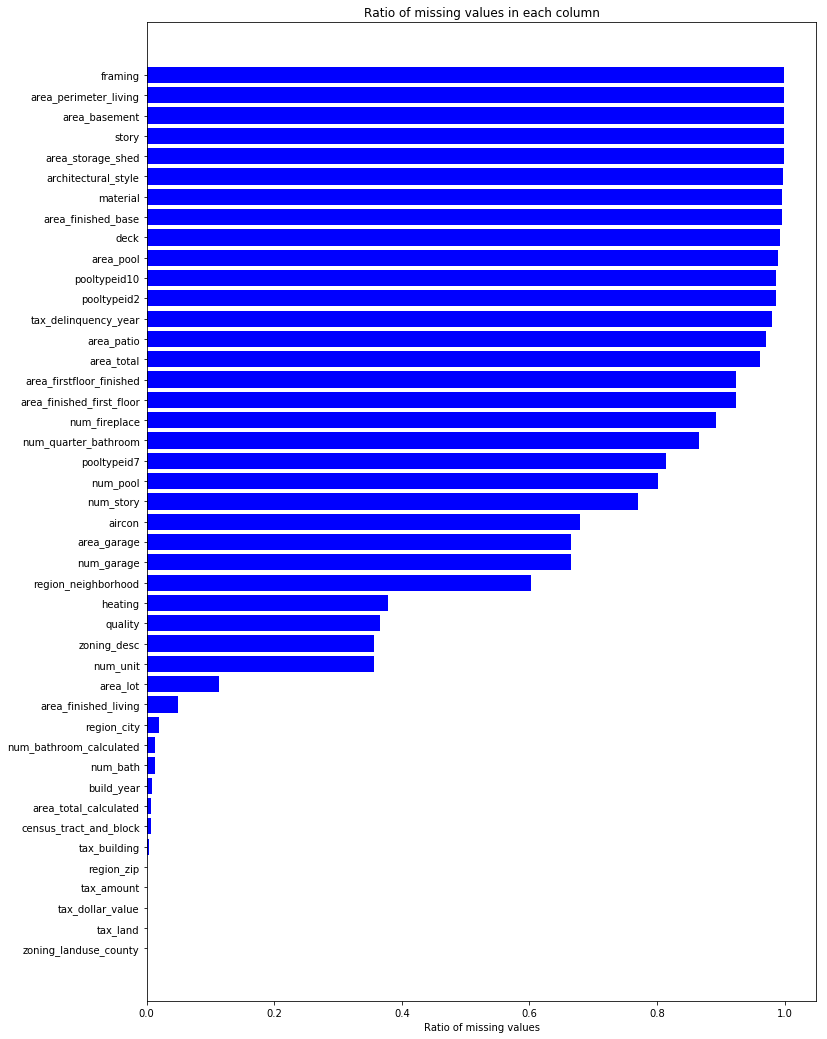

In [12]:
missing_values_df = merged_df.isnull().sum(axis=0).reset_index()
missing_values_df.columns = ['column_name', 'missing_count']
missing_values_df['missing_ratio'] = missing_values_df['missing_count'] / merged_df.shape[0]

missing_values_df = missing_values_df[missing_values_df['missing_count'] > 0]
missing_values_df = missing_values_df.sort_values(by='missing_count')

ind = np.arange(missing_values_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values_df['missing_ratio'], color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values_df['column_name'], rotation='horizontal')
ax.set_xlabel("Ratio of missing values")
ax.set_title("Ratio of missing values in each column")
plt.show()

### Remove features with high degree of missing values

In [13]:
removed_columns_df = missing_values_df[missing_values_df['missing_ratio'] > 0.75]
removed_columns = removed_columns_df[removed_columns_df.columns[0]].tolist()

good_features_df = merged_df.drop(removed_columns, axis=1)

print("Removed Features")
removed_columns

Removed Features


['num_story',
 'num_pool',
 'pooltypeid7',
 'num_quarter_bathroom',
 'num_fireplace',
 'area_finished_first_floor',
 'area_firstfloor_finished',
 'area_total',
 'area_patio',
 'tax_delinquency_year',
 'pooltypeid2',
 'pooltypeid10',
 'area_pool',
 'deck',
 'area_finished_base',
 'material',
 'architectural_style',
 'area_storage_shed',
 'story',
 'area_basement',
 'area_perimeter_living',
 'framing']

### Impute the rest of missing value (N/A) with Mean value

In [14]:
good_features_df = good_features_df.fillna(good_features_df.mean(), inplace=True)

# Compute the correlation matrix

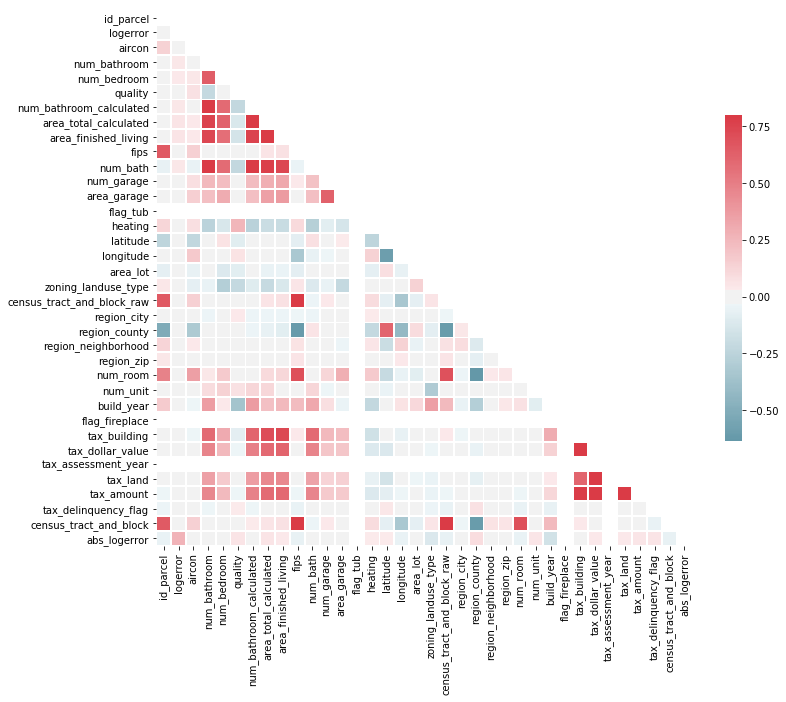

In [15]:
corr = good_features_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

### Remove Correlated Features

In [16]:
def remove_correlation(input_dataset, threshold):
    dataset = input_dataset.copy(deep=True)
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                colname_j = corr_matrix.columns[j] # getting the name of the other column
                col_corr.add(colname)
                if colname in dataset.columns:
                    print("Remove '{}' due to it's similarity to '{}'".format(colname, colname_j))
                    del dataset[colname] # deleting the column from the dataset

    return dataset, col_corr

In [17]:
# threshold value
correlation_threshold = 0.9

cleaned_df, removed_columns = remove_correlation(good_features_df, correlation_threshold)

removed_columns

Remove 'num_bathroom_calculated' due to it's similarity to 'num_bathroom'
Remove 'area_finished_living' due to it's similarity to 'area_total_calculated'
Remove 'num_bath' due to it's similarity to 'num_bathroom'
Remove 'census_tract_and_block_raw' due to it's similarity to 'fips'
Remove 'tax_land' due to it's similarity to 'tax_dollar_value'
Remove 'tax_amount' due to it's similarity to 'tax_dollar_value'
Remove 'census_tract_and_block' due to it's similarity to 'fips'


{'area_finished_living',
 'census_tract_and_block',
 'census_tract_and_block_raw',
 'num_bath',
 'num_bathroom_calculated',
 'tax_amount',
 'tax_land'}

### Manual Feature Removal Engineering

In [18]:
cleaned_df = cleaned_df.drop(['tax_assessment_year'], axis=1)

### Compute the correlation matrix

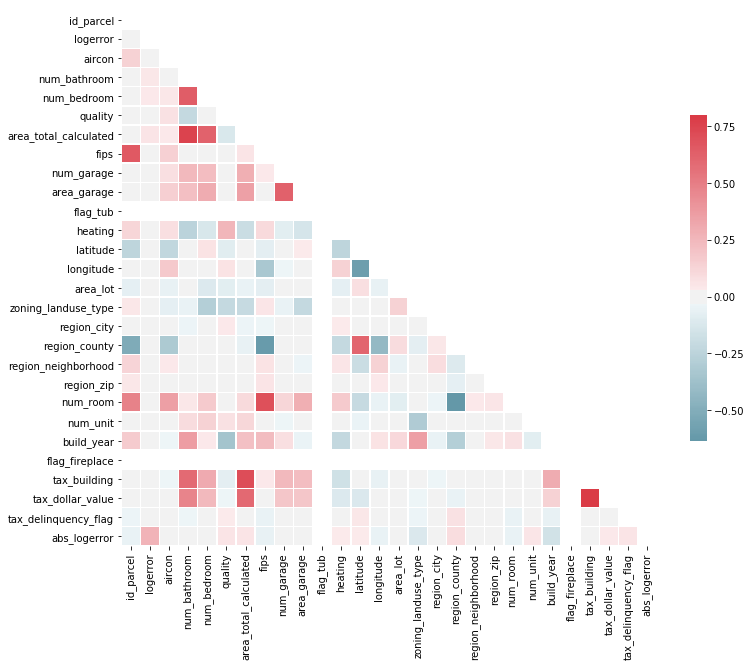

In [19]:
new_corr = cleaned_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(new_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(new_corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Selection with XGBoost Feature Importance Scores

In [ ]:
def dataframe_split(dataframe, target_column, as_matrix=True):
    target = dataframe[target_column]
    features = dataframe.loc[:, dataframe.columns != target_column]
    if as_matrix:
        target = target.as_matrix()
        features = features.as_matrix()
    return features, target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from neupy import algorithms, estimators, environment

environment.reproducible()

target_column = 'logerror'
xgb_df = cleaned_df.drop(["id_parcel", "transaction_date"], axis=1)

features, target = dataframe_split(xgb_df, target_column)

x_train, x_test, y_train, y_test = train_test_split(
    features,
    target.reshape((-1, 1)),
    test_size=0.3,
)

In [ ]:
from xgboost import XGBClassifier

# fit model no training data
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train.ravel())

# feature importance
xgb_model.feature_importances_

### Plot Geo Location

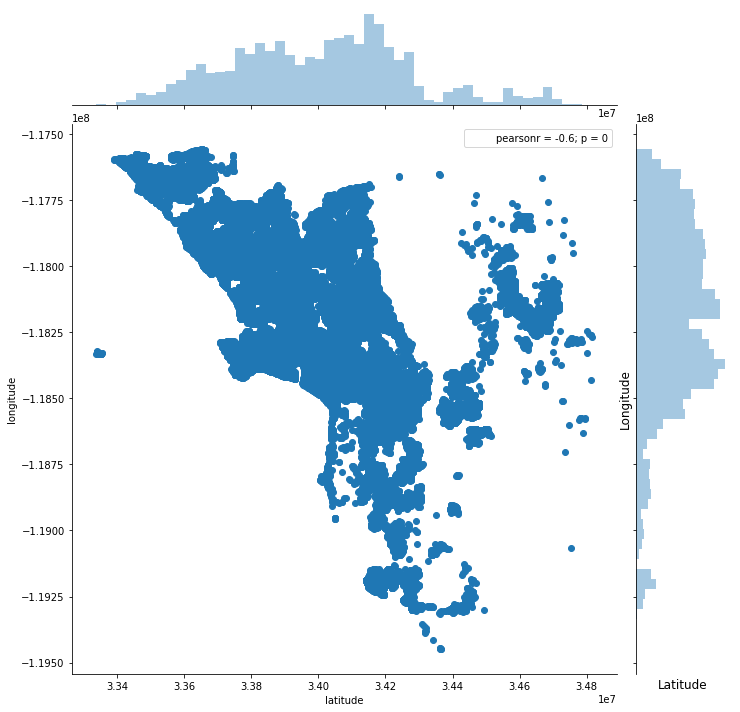

In [20]:
plt.figure(figsize=(12,12))
sns.jointplot(x=cleaned_df['latitude'], y=cleaned_df['longitude'], size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

### One-Hot Encoding for Zoning Data

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

zoning_df = cleaned_df.filter(like='zoning', axis=1)
other_df = cleaned_df.drop(zoning_df.columns.tolist(), axis=1)

zoning_df['zoning_landuse'] = zoning_df['zoning_landuse'].astype('category')

zoning_df = pd.get_dummies(zoning_df)


cleaned_df = pd.concat([other_df, zoning_df], axis=1)

cleaned_df.head(3)

### Test Neupy GRNN on our dataset

In [ ]:
def dataframe_split(dataframe, target_column, as_matrix=True):
    target = dataframe[target_column]
    features = dataframe.loc[:, dataframe.columns != target_column]
    if as_matrix:
        target = target.as_matrix()
        features = features.as_matrix()
    return features, target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from neupy import algorithms, estimators, environment

environment.reproducible()

target_column = 'logerror'
dropped_columns = [
    "id_parcel", 
    "transaction_date",
    "latitude",
    "longitude",
    "zoning_desc",
    "zoning_landuse_type",
    "zoning_landuse_county",
    "abs_logerror"
]

final_df = cleaned_df.drop(dropped_columns, axis=1)

features, target = dataframe_split(final_df, target_column)

x_train, x_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(features),
    preprocessing.minmax_scale(target.reshape((-1, 1))),
    test_size=0.3,
)

grnn_model = algorithms.GRNN(std=0.7, verbose=True)
grnn_model.train(x_train, y_train)

y_predicted = grnn_model.predict(x_test)
estimators.rmse(y_predicted, y_test)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.7



### Evaluate the model

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
from neupy import estimators


print("Root Mean Square Error (0=Best, 1=Worst): {}".format(estimators.rmse(y_test, y_predicted)))
print("Mean Absolute Error (0=Best, 1=Worst): {}".format(mean_absolute_error(y_test, y_predicted)))
print("Median Absolute Error (0=Best, 1=Worst): {}".format(median_absolute_error(y_test, y_predicted)))
print("R2 Score (1=Best, 0=Worst): {}".format(r2_score(y_test, y_predicted)))
print("Explained Variance Score (1=Best, 0=Worst): {}".format(explained_variance_score(y_test, y_predicted)))

### Residual Plot

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(y_predicted.ravel(), y_test.ravel(), lowess=True)

There is no pattern on the residual plot, that means our model decently predict the target class, since,

1. they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot
2. they’re clustered around the lower single digits of the y-axis (e.g., 0.5 or 1.5, not 30 or 150)
3. in general there aren’t clear patterns

In [ ]:
df_test = pd.DataFrame(np.concatenate((y_test, y_predicted), axis=1), columns={'actual_shares_log', 'predicted_shares_log'})
df_test.to_csv('grnn_prediction_result.csv', sep=',', encoding='utf-8', index=False)

### Grid search for std parameters

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from neupy import algorithms, estimators, environment
import pickle

environment.reproducible()

target_column = 'logerror'
dropped_columns = [
    "id_parcel", 
    "transaction_date",
    "latitude",
    "longitude",
    "zoning_desc",
    "zoning_landuse_type",
    "zoning_landuse_county",
    "abs_logerror"
]

final_df = cleaned_df.drop(dropped_columns, axis=1)

features, target = dataframe_split(final_df, target_column)

x_train, x_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(features),
    preprocessing.minmax_scale(target.reshape((-1, 1))),
    test_size=0.3,
)

params = np.linspace(0.1, 0.9, 9)

best_rmse = 1
best_std = 0

for std in params:
    grnn = algorithms.GRNN(std=std, verbose=True)
    grnn.train(x_train, y_train)
    
    y_predicted = grnn.predict(x_test)
    rmse = estimators.rmse(y_predicted, y_test)
    print("RMSE {} for std {}".format(rmse, std))
    if rmse < best_rmse:
        best_rmse = rmse
        best_std = std
        
        with open('grnn.pickle', 'wb') as f:
            pickle.dump(grnn, f)
    else:
        print("Exit Grid Search")
        break

print("Best std = {} with RMSE = {}".format(best_std, best_rmse))

# Load saved GRNN model

In [ ]:
with open('grnn.pickle', 'rb') as f:
    grnn = pickle.load(f)
    
    y_predicted = grnn.predict(x_test)

In [ ]:
df_test = pd.DataFrame(np.concatenate((y_test, y_predicted), axis=1), columns={'actual_shares_log', 'predicted_shares_log'})
df_test.to_csv('grnn_prediction_result_best.csv', sep=',', encoding='utf-8', index=False)